In [1]:
import pandas as pd
import sklearn
import numpy as np
import math
import os


os.getcwd()

'C:\\Users\\Indyscout\\Documents\\Masters_Program\\SECURITY2.0\\CYBRProject'

In [2]:
dataRaw = pd.read_csv('https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv')
dataRaw.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                2   
1                    0              0  ...                1                2   
2                    0              0  ...                1                2   
3                    0              0  ...                1                2   
4                    0              0  ...                1                2   

   qty_mx_servers  ttl_hostname  tls_ssl_certificate  qty_redirects  \
0               0           892                    0              0   
1               1          9540                    1              0   
2               3           589                    1              0   
3               0           292                    1              0   
4               1          3597                    0              1   

   url_google_index  domain_google_index  url_shortened  phishing  
0                 0                    0              0         1  
1                 0                    0              0         1  
2                 0                    0              0         0  
3                 0                    0              0         1  
4                 0                    0              0         0  

[5 rows x 112 columns]

In [3]:
dataRaw.shape

(88647, 112)

In [4]:
dataRaw.describe()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000      0.000000      0.000000   
25%                0.000000       0.000000      0.000000      0.000000   
50%                0.000000       0.000000      0.000000      0.000000   
75%                0.000000       0.000000      0.000000      0.000000   
max                9.000000      23.000000     43.000000     26.000000   

       qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  \
count         88647.000000   88647.000000  ...     88647.000000   
mean              0.002944       0.001015  ...         1.136564   
std               0.087341       0.072653  ...         0.895146   
min               0.000000       0.000000  ...        -1.000000   
25%               0.000000       0.000000  ...         1.000000   
50%               0.000000       0.000000  ...         1.000000   
75%               0.000000       0.000000  ...         1.000000   
max              10.000000       9.000000  ...        24.000000   

       qty_nameservers  qty_mx_servers   ttl_hostname  tls_ssl_certificate  \
count     88647.000000    88647.000000   88647.000000         88647.000000   
mean          2.772412        1.742428    6159.877514             0.506447   
std           1.322999        1.706705   11465.583810             0.499961   
min           0.000000        0.000000      -1.000000             0.000000   
25%           2.000000        1.000000     292.000000             0.000000   
50%           2.000000        1.000000    2029.000000             1.000000   
75%           4.000000        2.000000   10798.000000             1.000000   
max          20.000000       20.000000  604800.000000             1.000000   

       qty_redirects  url_google_index  domain_google_index  url_shortened  \
count   88647.000000       88647.00000         88647.000000   88647.000000   
mean        0.343903           0.00141             0.002019       0.005482   
std         0.783892           0.05864             0.063250       0.073841   
min        -1.000000          -1.00000            -1.000000       0.000000   
25%         0.000000           0.00000             0.000000       0.000000   
50%         0.000000           0.00000             0.000000       0.000000   
75%         1.000000           0.00000             0.000000       0.000000   
max        17.000000           1.00000             1.000000       1.000000   

           phishing  
count  88647.000000  
mean       0.345720  
std        0.475605  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 112 columns]

In [3]:
# Noticed a discrepancy in the data, some values are recorded as -1 even though it makes not practical sense, i.e. you can't have a negative quantity of a character
# This changes all -1 to 0

def remove_negatives(df):
    df[df == -1] = 0

remove_negatives(dataRaw)

In [4]:
# unit test to check if the negative values are still present

is_it_working = []
def data_cleaning_unit_test(column):
    did_it_work =  {'Yes':0 , 'No':0}
    for i in column:
        if i >= 0:
            did_it_work['Yes'] += 1 # This tracks the number of values that are non-negative
        elif i <0:
            did_it_work['No'] += 1 # This trackes the number of values that are negative
    if did_it_work['No'] > 0:
        print(column.name,'=', 'Not working') # If there are any values that are negative, the script didn't work
    else:
        print(column.name,'=', 'It worked!')

In [5]:
# applying the unit test function to each of the columns in the feature set 

for col in dataRaw.columns.tolist(): # this loop applies the unit test function to every column in the data frame
    data_cleaning_unit_test(dataRaw[col]) #

qty_dot_url = It worked!
qty_hyphen_url = It worked!
qty_underline_url = It worked!
qty_slash_url = It worked!
qty_questionmark_url = It worked!
qty_equal_url = It worked!
qty_at_url = It worked!
qty_and_url = It worked!
qty_exclamation_url = It worked!
qty_space_url = It worked!
qty_tilde_url = It worked!
qty_comma_url = It worked!
qty_plus_url = It worked!
qty_asterisk_url = It worked!
qty_hashtag_url = It worked!
qty_dollar_url = It worked!
qty_percent_url = It worked!
qty_tld_url = It worked!
length_url = It worked!
qty_dot_domain = It worked!
qty_hyphen_domain = It worked!
qty_underline_domain = It worked!
qty_slash_domain = It worked!
qty_questionmark_domain = It worked!
qty_equal_domain = It worked!
qty_at_domain = It worked!
qty_and_domain = It worked!
qty_exclamation_domain = It worked!
qty_space_domain = It worked!
qty_tilde_domain = It worked!
qty_comma_domain = It worked!
qty_plus_domain = It worked!
qty_asterisk_domain = It worked!
qty_hashtag_domain = It worked!
qty_dolla

#### Preliminary Random Forest Model

In [6]:
Features = dataRaw.iloc[:,:-1] # target is in last column
X = Features
y = dataRaw['phishing']
X.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  time_domain_expiration  \
0                    0              0  ...                       0   
1                    0              0  ...                     150   
2                    0              0  ...                       0   
3                    0              0  ...                       0   
4                    0              0  ...                     306   

   qty_ip_resolved  qty_nameservers  qty_mx_servers  ttl_hostname  \
0                1                2               0           892   
1                1                2               1          9540   
2                1                2               3           589   
3                1                2               0           292   
4                1                2               1          3597   

   tls_ssl_certificate  qty_redirects  url_google_index  domain_google_index  \
0                    0              0                 0                    0   
1                    1              0                 0                    0   
2                    1              0                 0                    0   
3                    1              0                 0                    0   
4                    0              1                 0                    0   

   url_shortened  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 111 columns]

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [8]:
# making model
model_1 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_1.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [19]:
model_1.feature_importances_

array([1.39133652e-02, 1.30185343e-02, 5.37978524e-03, 1.30041780e-01,
       4.84672552e-05, 1.03706504e-02, 1.06616292e-03, 3.34056803e-03,
       5.11655762e-05, 9.98384979e-07, 5.87751095e-05, 5.90870381e-05,
       1.99433412e-04, 1.87089487e-05, 2.13077748e-07, 7.60169016e-06,
       9.31071124e-04, 1.92873678e-03, 1.08160228e-01, 2.86608062e-02,
       3.12365218e-03, 1.56408665e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.99843803e-03, 1.30001281e-02, 3.49961817e-04, 8.71646961e-05,
       4.38210407e-02, 1.14699033e-02, 2.93227345e-03, 1.49663272e-01,
       0.00000000e+00, 2.22532385e-04, 1.02022180e-04, 1.69527339e-05,
       2.04505091e-05, 6.90173449e-07, 6.36796011e-05, 9.83332191e-05,
       2.81370152e-05, 2.44331739e-05, 0.00000000e+00, 5.25256869e-06,
      

In [9]:
# Saving some validation predicitons and probabilites
val_preds = model_1.predict(val_X)
# predict probabilities
probs = model_1.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_1 = probs[:, 1]


In [10]:
# Scoring model: Accuracy, F1 Score, Average Precision
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score


print("Mean Accuracy on Test Data:",model_1.score(val_X,val_y))
print("F1 Score:",f1_score(val_y,val_preds))
print("Average Precision:", average_precision_score(val_y, probs_1)) # second input must be y probability estimates of the positive class

Mean Accuracy on Test Data: 0.9647143759588485
F1 Score: 0.9491349030831274
Average Precision: 0.9885203304612348


In [11]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y,val_preds)

array([[14084,   422],
       [  360,  7296]], dtype=int64)

In [12]:
# Going to plot the ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# AUC
auc = roc_auc_score(val_y, probs_1)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_1)

RandomForest: ROC AUC=0.994


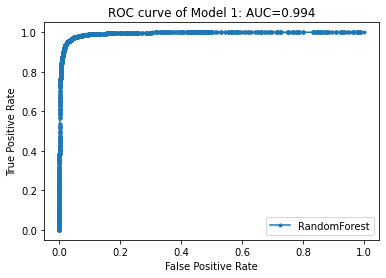

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Model 1", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 1: AUC=0.989')

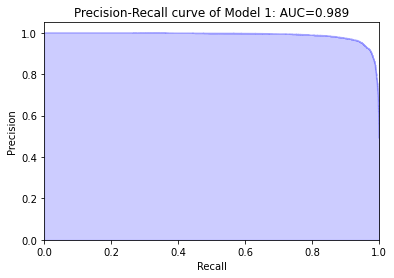

In [14]:
# Precision recall curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_1)
test_average_precision = average_precision_score(val_y, probs_1)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 1", str_average_precision))

In [20]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cv_scores_1 = cross_val_score(model_1, X, y, cv=10)
cv_scores_1

# these scores look promising

array([0.96525663, 0.96694867, 0.95972927, 0.96300056, 0.96209814,
       0.96367738, 0.96446701, 0.96626805, 0.96604242, 0.96423736])

In [19]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_1)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[1])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[1])

In [20]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_1)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[12])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[12])

I am hoping that these SHAP values will help shed some light on the significane of certain features. 

#### Shap Summary: 
- WARNING: If you want to run the notebook on your machine, I recommend commenting out the shap summary plot below because it takes a long time. There is another at the end of the notebook.
- Since this is computationally intensive so I will only run this on the first and final models


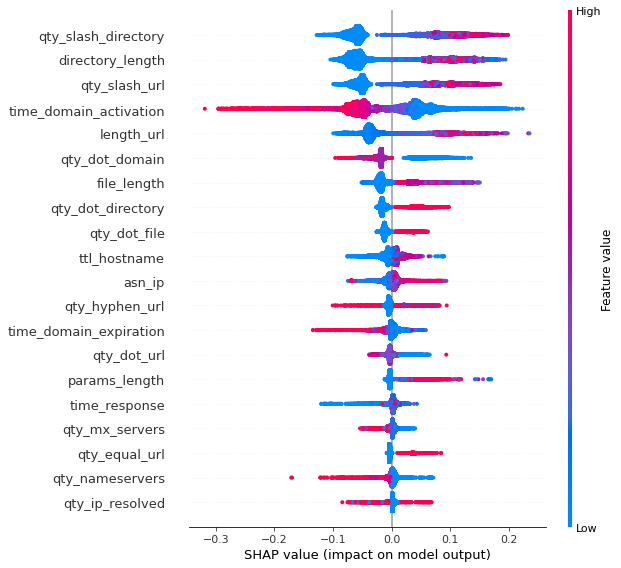

In [21]:
# SHAP summary plot
shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values[1], val_X) # must values to [1] because this a classification problem and we need the probabilities for the positive class. 

**The next 6 models are subsetted based on the tables outlined in the dataset description.
Refer to the data journal to see the tables listed out:** 
https://www.sciencedirect.com/science/article/pii/S2352340920313202

#### Table 1 RF Model

In [22]:
# Making RF for table 1, first I need to subset the table 1 features; Table 1 is the URL table, no external services
Features_table1 = ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url',
                         'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url',
                         'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url',
                         'length_url', 'email_in_url']
# X and y
X = dataRaw[Features_table1]
y= dataRaw['phishing']

In [23]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [24]:
# making model
model_2 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_2.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [25]:
# Saving some validation predicitons and probabilites
val_preds_table1 = model_2.predict(val_X)
# predict probabilities
probs_table1 = model_2.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table1 = probs_table1[:, 1]

In [26]:
print("Mean Accuracy on Table 1 Test Data:",model_2.score(val_X,val_y))
print("Table 1 F1 Score:",f1_score(val_y,val_preds_table1))
print("Table 1 Average Precision:", average_precision_score(val_y, probs_table1)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 1 Test Data: 0.907318834040249
Table 1 F1 Score: 0.871625
Table 1 Average Precision: 0.9438487794253738


In [27]:
# Confusion Matrix
confusion_matrix(val_y,val_preds)

array([[14084,   422],
       [  360,  7296]], dtype=int64)

In [28]:
# Cross Validation
cv_scores_2 = cross_val_score(model_2, X, y, cv=10)
cv_scores_2

array([0.91269036, 0.9105471 , 0.907163  , 0.90908065, 0.90693739,
       0.90953187, 0.90806543, 0.90625   , 0.90918321, 0.90703971])

In [29]:
#plotting ROC

# AUC
auc = roc_auc_score(val_y, probs_table1)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_table1)

RandomForest: ROC AUC=0.969


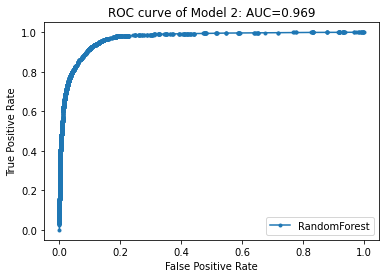

In [30]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Model 2", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 2: AUC=0.944')

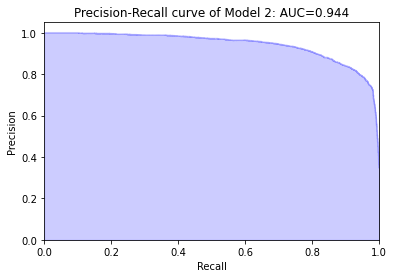

In [31]:
# Precision Recall Curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_table1)
test_average_precision = average_precision_score(val_y, probs_table1)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 2", str_average_precision))

In [32]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_2)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[15])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[15])

In [33]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_2)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[10])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[10])

#### Table 2 RF Model

In [21]:
# Making RF for table 2, first I need to subset the table 2 features; Table 2 is features specific to the 'domain' section of the URL
Features_table2 = ['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 
                   'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 
                   'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 
                   'domain_length', 'domain_in_ip', 'server_client_domain']
# X and y
X = dataRaw[Features_table2]
y= dataRaw['phishing']

In [22]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [23]:
# making model
model_3 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_3.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [24]:
# Saving some validation predicitons and probabilites
val_preds_table2 = model_3.predict(val_X)
# predict probabilities
probs_table2 = model_3.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table2 = probs_table2[:, 1]

In [25]:
print("Mean Accuracy on Table 2 Test Data:",model_3.score(val_X,val_y))
print("Table 2 F1 Score:",f1_score(val_y,val_preds_table2))
print("Table 2 Average Precision:", average_precision_score(val_y, probs_table2)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 2 Test Data: 0.7569713924736035
Table 2 F1 Score: 0.6050161337635671
Table 2 Average Precision: 0.68337414669185


In [39]:
# Confusion Matrix
confusion_matrix(val_y,val_preds)

array([[14084,   422],
       [  360,  7296]], dtype=int64)

In [40]:
# Cross Validation
cv_scores_3 = cross_val_score(model_3, X, y, cv=10)
cv_scores_3

array([0.75882685, 0.75995488, 0.76333897, 0.74427524, 0.75375071,
       0.75758601, 0.76142132, 0.75349729, 0.76319946, 0.76252256])

In [41]:
#plotting ROC

# AUC
auc = roc_auc_score(val_y, probs_table2)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_table2)

RandomForest: ROC AUC=0.789


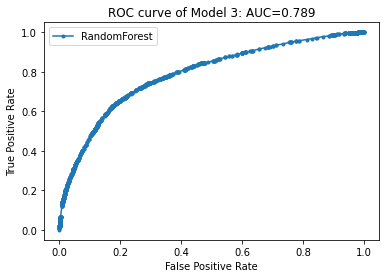

In [42]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Model 3", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 3: AUC=0.683')

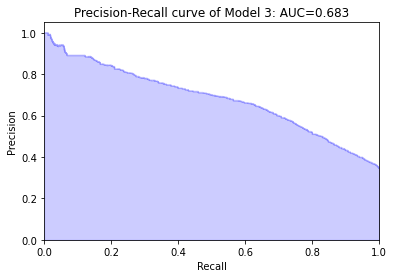

In [43]:
# Precision Recall Curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_table2)
test_average_precision = average_precision_score(val_y, probs_table2)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 3", str_average_precision))

In [44]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_3)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[15])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[15])

In [45]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_3)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[10])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[10])

#### Table 3 RF Model

In [46]:
# Making RF for table 3, first I need to subset the table 3 features; Table 3 is features specific to the 'directory' section of the URL
Features_table3 =['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 
                  'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 
                  'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length']

# X and y
X = dataRaw[Features_table3]
y= dataRaw['phishing']

In [47]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [48]:
# making model
model_4 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_4.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [49]:
# Saving some validation predicitons and probabilites
val_preds_table3 = model_4.predict(val_X)
# predict probabilities
probs_table3 = model_4.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table3 = probs_table3[:, 1]

In [50]:
print("Mean Accuracy on Table 3 Test Data:",model_4.score(val_X,val_y))
print("Table 3 F1 Score:",f1_score(val_y,val_preds_table3))
print("Table 3 Average Precision:", average_precision_score(val_y, probs_table3)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 3 Test Data: 0.9043858857503836
Table 3 F1 Score: 0.8617111531684397
Table 3 Average Precision: 0.9213205388673371


In [51]:
# Confusion Matrix
confusion_matrix(val_y,val_preds)

array([[14084,   422],
       [  360,  7296]], dtype=int64)

In [52]:
# Cross Validation
cv_scores_4 = cross_val_score(model_4, X, y, cv=10)
cv_scores_4

array([0.89768754, 0.90456853, 0.89904117, 0.9034405 , 0.89904117,
       0.90208686, 0.9035533 , 0.90173736, 0.90523466, 0.90275271])

In [53]:
#plotting ROC

# AUC
auc = roc_auc_score(val_y, probs_table2)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_table3)

RandomForest: ROC AUC=0.789


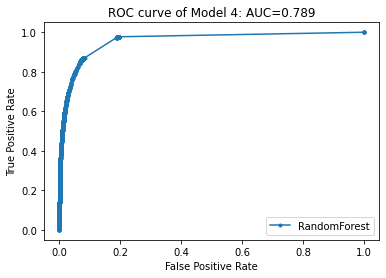

In [54]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Model 4", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 4: AUC=0.921')

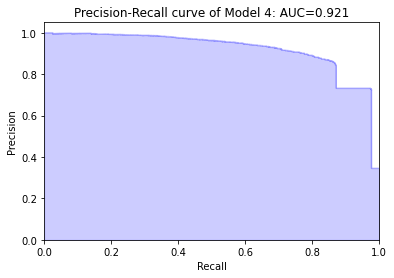

In [55]:
# Precision Recall Curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_table3)
test_average_precision = average_precision_score(val_y, probs_table3)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 4", str_average_precision))

In [56]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_4)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[15])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[15])

In [57]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_4)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[10])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[10])

#### Table 4 RF Model

In [58]:
# Making RF for table 4, first I need to subset the table 4 features; Table 4 is features specific to the 'URL File Name' section of the URL
Features_table4 = ['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 
                   'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 
                   'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_percent_file', 'file_length']

# X and y
X = dataRaw[Features_table4]
y= dataRaw['phishing']

In [59]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [60]:
# making model
model_5 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_5.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [61]:
# Saving some validation predicitons and probabilites
val_preds_table4 = model_5.predict(val_X)
# predict probabilities
probs_table4 = model_5.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table4 = probs_table4[:, 1]

In [62]:
print("Mean Accuracy on Table 4 Test Data:",model_5.score(val_X,val_y))
print("Table 4 F1 Score:",f1_score(val_y,val_preds_table4))
print("Table 4 Average Precision:", average_precision_score(val_y, probs_table4)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 4 Test Data: 0.8176157386517462
Table 4 F1 Score: 0.6838235294117647
Table 4 Average Precision: 0.6847795145124755


In [63]:
# Confusion Matrix
confusion_matrix(val_y,val_preds)

array([[14084,   422],
       [  360,  7296]], dtype=int64)

In [64]:
# Cross Validation
cv_scores_5 = cross_val_score(model_5, X, y, cv=10)
cv_scores_5

array([0.8144388 , 0.81974055, 0.80812183, 0.81635646, 0.8142132 ,
       0.80936266, 0.81658206, 0.81577166, 0.81193592, 0.816787  ])

In [65]:
#plotting ROC

# AUC
auc = roc_auc_score(val_y, probs_table2)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_table4)

RandomForest: ROC AUC=0.789


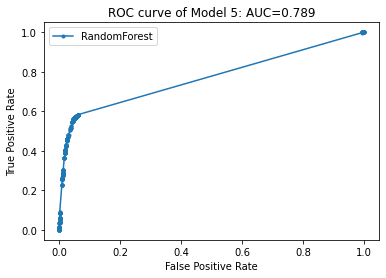

In [66]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Model 5", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 5: AUC=0.685')

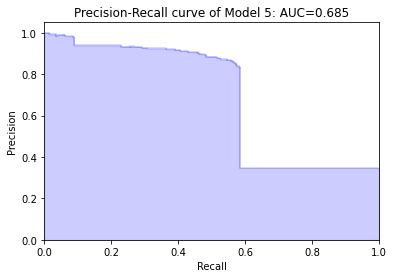

In [67]:
# Precision Recall Curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_table4)
test_average_precision = average_precision_score(val_y, probs_table4)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 5", str_average_precision))

In [68]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_5)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[15])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[15])

In [69]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_5)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[10])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[10])

#### Table 5 RF Model

In [70]:
# Making RF for table 4, first I need to subset the table 4 features; Table 4 is features specific to the 'URL Parameters' section of the URL
Features_table5 = ['qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 'qty_percent_params', 'params_length', 'tld_present_params', 'qty_params']

# X and y
X = dataRaw[Features_table5]
y= dataRaw['phishing']

In [71]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [72]:
# making model
model_6 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_6.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [73]:
# Saving some validation predicitons and probabilites
val_preds_table5 = model_6.predict(val_X)
# predict probabilities
probs_table5 = model_6.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table5 = probs_table5[:, 1]

In [74]:
print("Mean Accuracy on Table 5 Test Data:",model_6.score(val_X,val_y))
print("Table 5 F1 Score:",f1_score(val_y,val_preds_table5))
print("Table 5 Average Precision:", average_precision_score(val_y, probs_table5)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 5 Test Data: 0.7244833498781699
Table 5 F1 Score: 0.35083988943227723
Table 5 Average Precision: 0.48605755397175776


* Table models with low performance metrics might indicate that these features are less significant

In [75]:
# Confusion Matrix
confusion_matrix(val_y,val_preds)

array([[14084,   422],
       [  360,  7296]], dtype=int64)

In [76]:
# Cross Validation
cv_scores_6 = cross_val_score(model_6, X, y, cv=10)
cv_scores_6

array([0.72250423, 0.72961083, 0.72295544, 0.72385787, 0.72442188,
       0.72453469, 0.72069938, 0.72630866, 0.723037  , 0.72687274])

In [77]:
#plotting ROC

# AUC
auc = roc_auc_score(val_y, probs_table2)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_table5)

RandomForest: ROC AUC=0.789


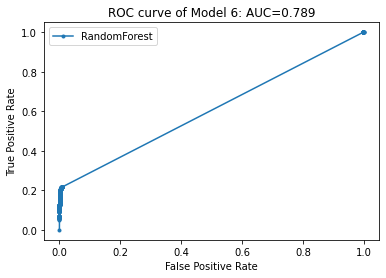

In [78]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Model 6", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 6: AUC=0.486')

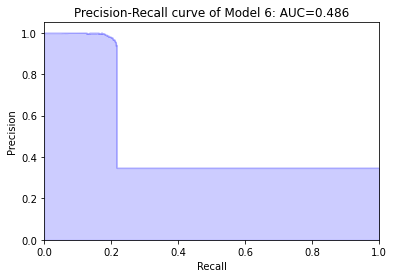

In [79]:
# Precision Recall Curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_table5)
test_average_precision = average_precision_score(val_y, probs_table5)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 6", str_average_precision))

In [80]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_6)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[15])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[15])

In [81]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_6)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[10])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[10])

#### Table 6 RF Model

In [82]:
# Making RF for table 6, first I need to subset the table 6 features; Table 6 is features specific to 'resolving URL and external services' 
Features_table6 = ['time_response', 'domain_spf', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved', 
                   'qty_nameservers', 'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects', 'url_google_index', 
                   'domain_google_index', 'domain_google_index', 'url_shortened']
# X and y
X = dataRaw[Features_table6]
y= dataRaw['phishing']

In [83]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [84]:
# making model
model_7 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_7.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [85]:
# Saving some validation predicitons and probabilites
val_preds_table6 = model_7.predict(val_X)
# predict probabilities
probs_table6 = model_7.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table6 = probs_table6[:, 1]

In [86]:
print("Mean Accuracy on Table 6 Test Data:",model_7.score(val_X,val_y))
print("Table 6 F1 Score:",f1_score(val_y,val_preds_table1))
print("Table 6 Average Precision:", average_precision_score(val_y, probs_table3)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 6 Test Data: 0.8800649760851909
Table 6 F1 Score: 0.871625
Table 6 Average Precision: 0.9213205388673371


In [87]:
# Confusion Matrix
confusion_matrix(val_y,val_preds)

array([[14084,   422],
       [  360,  7296]], dtype=int64)

In [88]:
# Cross Validation
cv_scores_7 = cross_val_score(model_7, X, y, cv=10)
cv_scores_7

array([0.87760857, 0.88606881, 0.8822335 , 0.88257191, 0.87783418,
       0.87648054, 0.88099267, 0.88368682, 0.87906137, 0.88233303])

In [89]:
#plotting ROC

# AUC
auc = roc_auc_score(val_y, probs_table2)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_table6)

RandomForest: ROC AUC=0.789


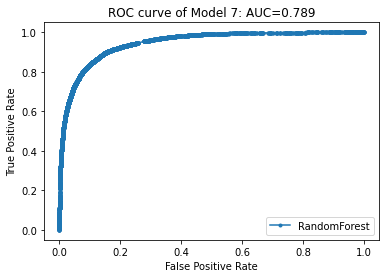

In [90]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Model 7", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 7: AUC=0.909')

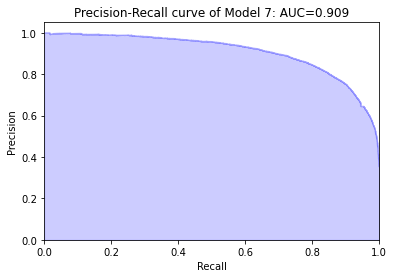

In [91]:
# Precision Recall Curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_table6)
test_average_precision = average_precision_score(val_y, probs_table6)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 7", str_average_precision))

In [92]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_7)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[15])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[15])

In [93]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_7)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[10])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[10])

#### Rank of Performance Metrics by Table

From Best to Worst:
- All Tables (Full Dataset)
- Table 1
- Table 3
- Table 6
- Table 4
- Table 2
- Table 5

- Mean Accuracy on Table 1 Test Data: 0.907318834040249
- Table 1 F1 Score: 0.871625
- Table 1 Average Precision: 0.9438487794253738
- Mean Accuracy on Table 2 Test Data: 0.7569713924736035
- Table 2 F1 Score: 0.6050161337635671
- Table 2 Average Precision: 0.68337414669185
- Mean Accuracy on Table 3 Test Data: 0.9043858857503836
- Table 3 F1 Score: 0.8617111531684397
- Table 3 Average Precision: 0.9213205388673371

- Mean Accuracy on Table 4 Test Data: 0.8176157386517462
- Table 4 F1 Score: 0.6838235294117647
- Table 4 Average Precision: 0.6847795145124755

- Mean Accuracy on Table 5 Test Data: 0.7244833498781699
- Table 5 F1 Score: 0.35083988943227723
- Table 5 Average Precision: 0.48605755397175776

- Mean Accuracy on Table 6 Test Data: 0.8800649760851909
- Table 6 F1 Score: 0.871625
- Table 6 Average Precision: 0.9213205388673371

#### Final Model: Full Dataset using RFE feature selection

In [3]:
Features = dataRaw.iloc[:,:-1] # target is in last column
X = Features
y = dataRaw['phishing']
X.shape

(88647, 111)

In [6]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [7]:
# making model on full dataset to use RFE selector on

model_full = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_full.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [97]:
# Going to use recursive feature elimination from sklearn to get top 50 features
from sklearn.feature_selection import RFE

selector = RFE(estimator = model_full, n_features_to_select= 50, step=1)
selector = selector.fit(X, y)


In [98]:
# This should return a boolean which I can use to index the feature set
selector_index = selector.get_support()

In [99]:
# indexing features based on the RFE selector

final_Features = Features.iloc[:,selector_index]

# what are the features?
final_Features.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_plus_url',
       'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain',
       'qty_hyphen_domain', 'qty_vowels_domain', 'domain_length',
       'domain_in_ip', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory',
       'qty_comma_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_comma_file', 'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_underline_params', 'qty_slash_params', 'qty_equal_params',
       'qty_and_params', 'params_length', 'tld_present_params', 'qty_params',
       'time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certi

In [100]:
# Setting X and y

X = final_Features
y = dataRaw['phishing']

# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [101]:
# Final model

model_final = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_final.fit(train_X,train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=False)

In [102]:
# Saving some validation predicitons and probabilites
val_preds = model_final.predict(val_X)
# predict probabilities
probs = model_final.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_final = probs[:, 1]


In [103]:
print("Mean Accuracy on Test Data:",model_final.score(val_X,val_y))
print("F1 Score:",f1_score(val_y,val_preds))
print("Average Precision:", average_precision_score(val_y, probs_final)) # second input must be y probability estimates of the positive class

Mean Accuracy on Test Data: 0.9675119574045664
F1 Score: 0.9531372038531633
Average Precision: 0.9900932617513359


In [104]:
# Going to plot the ROC 

# AUC
auc = roc_auc_score(val_y, probs_final)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_final)

RandomForest: ROC AUC=0.995


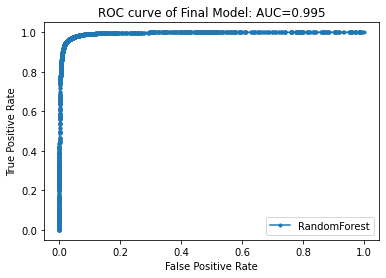

In [105]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Final Model", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Final Model: AUC=0.989')

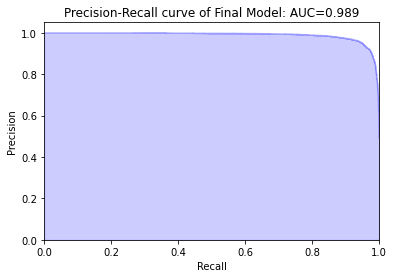

In [106]:
# Precision recall curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_1)
test_average_precision = average_precision_score(val_y, probs_1)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Final Model", str_average_precision))

In [107]:
# Confusion Matrix
confusion_matrix(val_y,val_preds)


array([[14120,   386],
       [  334,  7322]], dtype=int64)

In [108]:
# Cross Validation
cv_scores_final = cross_val_score(model_final, X, y, cv=10)
cv_scores_final

array([0.96751269, 0.96954315, 0.96311337, 0.96683587, 0.96491822,
       0.96649746, 0.96864072, 0.96965253, 0.96897563, 0.96638087])

In [109]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_final)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[15])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[15])

In [110]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_final)

# Calculate Shap values
shap_values = explainer.shap_values(val_X.iloc[10])

# Plot the ShAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[10])

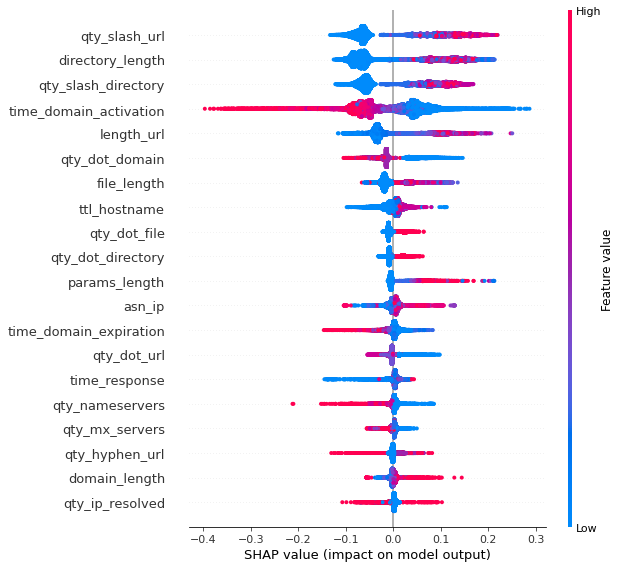

In [111]:
# WARNING: If you want to run the notebook on your machine, I recommend commenting out the shap summary plot below because it takes a long time.
# SHAP summary plot
shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values[1], val_X)